>Note: You can calculate the posterior directly for simple models (like the binomial) without MCMC, but MCMC is needed for complex models or high-dimensional data, where directly computing or normalizing the posterior is infeasible.

In [10]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define prior (Uniform distribution for probability of heads)
prior = tfp.distributions.Uniform(low=0., high=1.)

2024-12-27 08:12:49.774057: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-27 08:12:49.804305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 08:12:50.416700: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 08:12:51.200479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735283571.814403    9506 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735283572.03

In [3]:
print("prior:",prior)

prior: tfp.distributions.Uniform("Uniform", batch_shape=[], event_shape=[], dtype=float32)


In [4]:
# Define likelihood (Binomial: 7 heads out of 10 tosses)
likelihood = lambda p: tfp.distributions.Binomial(total_count=10, probs=p).prob(7)

In [7]:
# Posterior samples (via Bayesian update, simplified here)
posterior_samples = tfp.mcmc.sample_chain(
    num_results=1000,
    current_state=0.5,  # Start sampling at p=0.5
    kernel=tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=lambda p: tf.math.log(prior.prob(p)) + tf.math.log(likelihood(p)),
        step_size=0.1,
        num_leapfrog_steps=3,
    ),
    trace_fn=None
)

Markov Chain Monte Carlo (MCMC) sampling using the Hamiltonian Monte Carlo (HMC) method to approximate the posterior distribution:

- `num_results`=1000: Generates 1000 posterior samples.
- `current_state`=0.5: Starts sampling at p=0.5.
- `target_log_prob_fn`: Specifies the log of the posterior (prior + likelihood) to sample from.
- `HMC kernel`: Uses step_size and num_leapfrog_steps to explore the posterior efficiently.
It generates samples from the posterior when it's difficult to calculate directly.

An approximate posterior is an estimation of the posterior distribution derived by combining the prior and likelihood, especially when the exact computation is infeasible or complex. It provides a practical way to update beliefs based on data.

In [9]:
print("posterior_samples:",posterior_samples)

posterior_samples: tf.Tensor(
[0.5690326  0.7443862  0.5676445  0.7873527  0.7873527  0.63509065
 0.6339227  0.7560293  0.68755853 0.3375195  0.8267386  0.5684743
 0.729861   0.74730563 0.5292387  0.7911924  0.6783581  0.6382367
 0.6382367  0.7101854  0.62574565 0.62574565 0.59255344 0.773939
 0.5866783  0.855236   0.51635456 0.5785774  0.86000705 0.57494426
 0.555449   0.62004995 0.78994274 0.66434807 0.79128397 0.79128397
 0.3488065  0.6720027  0.781359   0.5130551  0.75222844 0.68566835
 0.7139541  0.6854719  0.73761487 0.6565268  0.5526569  0.72108203
 0.7020308  0.6524601  0.70971245 0.48402655 0.49267074 0.8699062
 0.38384816 0.907487   0.50447536 0.82910585 0.6246927  0.81323904
 0.6498832  0.7410137  0.73531526 0.5361115  0.5361115  0.82333815
 0.33234143 0.8399156  0.47390938 0.71810853 0.74768984 0.7179039
 0.6518683  0.51587504 0.81907064 0.5175187  0.5559685  0.81785345
 0.57466197 0.8279158  0.5665872  0.8687574  0.56862247 0.8699539
 0.56751305 0.6984492  0.6984492  0.338

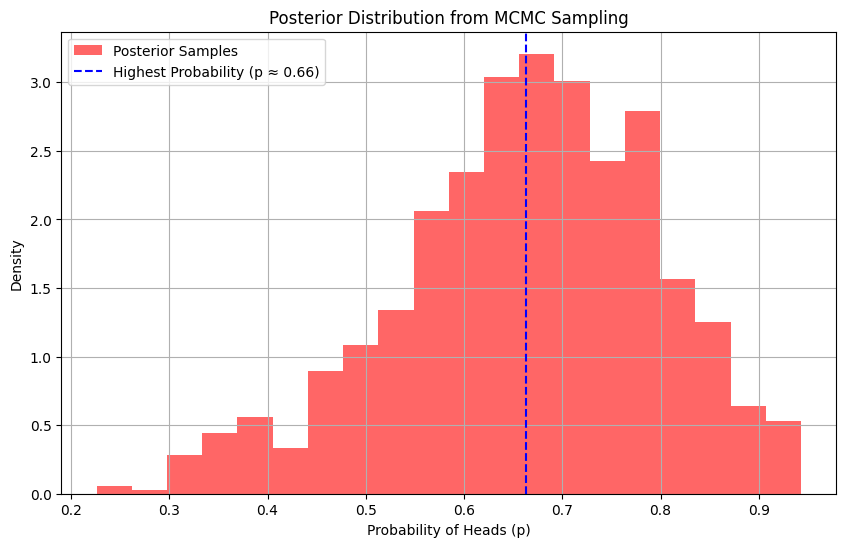

In [16]:
# Plot
# Evaluate posterior samples
posterior_samples_eval = posterior_samples.numpy()

# Plot histogram of posterior samples
plt.figure(figsize=(10, 6))
plt.hist(posterior_samples_eval, bins=20, density=True, alpha=0.6, color='red', label='Posterior Samples')

# Highlight the highest density region
highest_prob = posterior_samples_eval.mean()
plt.axvline(highest_prob, color='blue', linestyle='--', label=f'Highest Probability (p ≈ {highest_prob:.2f})')

# Add labels and legend
plt.title("Posterior Distribution from MCMC Sampling")
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()